In [104]:
%load_ext autoreload
%autoreload 2

import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import h5py

from forward_model import preprocessing_cosmogrid

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
path_cosmogrid = '/n17data/sguerrini/CosmoGridV1'

meta_info = h5py.File(path_cosmogrid+'/CosmoGridV1_metainfo.h5', 'r')    

In [76]:
meta_info["parameters"]["fiducial"]['path_par']

array([b'CosmoGrid/raw/fiducial/cosmo_fiducial/',
       b'CosmoGrid/raw/fiducial/cosmo_delta_H0_m/',
       b'CosmoGrid/raw/fiducial/cosmo_delta_H0_p/',
       b'CosmoGrid/raw/fiducial/cosmo_delta_Ob_m/',
       b'CosmoGrid/raw/fiducial/cosmo_delta_Ob_p/',
       b'CosmoGrid/raw/fiducial/cosmo_delta_Om_m/',
       b'CosmoGrid/raw/fiducial/cosmo_delta_Om_p/',
       b'CosmoGrid/raw/fiducial/cosmo_delta_bary_Mc_m/',
       b'CosmoGrid/raw/fiducial/cosmo_delta_bary_Mc_p/',
       b'CosmoGrid/raw/fiducial/cosmo_delta_bary_nu_m/',
       b'CosmoGrid/raw/fiducial/cosmo_delta_bary_nu_p/',
       b'CosmoGrid/raw/fiducial/cosmo_delta_ns_m/',
       b'CosmoGrid/raw/fiducial/cosmo_delta_ns_p/',
       b'CosmoGrid/raw/fiducial/cosmo_delta_s8_m/',
       b'CosmoGrid/raw/fiducial/cosmo_delta_s8_p/',
       b'CosmoGrid/raw/fiducial/cosmo_delta_w0_m/',
       b'CosmoGrid/raw/fiducial/cosmo_delta_w0_p/'], dtype='|S128')

In [59]:
shells = np.load('/n17data/sguerrini/CosmoGridV1/raw/fiducial/cosmo_fiducial/run_0000/compressed_shells.npz')

In [97]:
overdensity_array = shells['shells']

In [78]:
shell_info = shells['shell_info']

In [86]:
np.concatenate((shell_info['lower_z'], [shell_info['upper_z'][-1]]))

array([0.        , 0.01277548, 0.02578057, 0.03902289, 0.05251003,
       0.06625001, 0.08025129, 0.09452274, 0.1090737 , 0.1239141 ,
       0.1390541 , 0.1545049 , 0.1702779 , 0.1863854 , 0.2028402 ,
       0.2196561 , 0.2368474 , 0.2544296 , 0.2724188 , 0.2908324 ,
       0.3096887 , 0.3290072 , 0.3488088 , 0.3691156 , 0.3899513 ,
       0.4113412 , 0.4333125 , 0.4558939 , 0.4791168 , 0.5030144 ,
       0.5276226 , 0.5529801 , 0.5791287 , 0.6061132 , 0.6339825 ,
       0.6627892 , 0.6925908 , 0.7234494 , 0.7554329 , 0.7886154 ,
       0.823078  , 0.8589094 , 0.8962073 , 0.9350792 , 0.9756439 ,
       1.018033  , 1.062392  , 1.108884  , 1.157691  , 1.209016  ,
       1.263089  , 1.320168  , 1.380549  , 1.444565  , 1.5126    ,
       1.585096  , 1.662563  , 1.745596  , 1.834892  , 1.931274  ,
       2.03572   , 2.149406  , 2.273754  , 2.410506  , 2.561821  ,
       2.730411  , 2.919731  , 3.134262  , 3.379937  , 3.5       ],
      dtype=float32)

In [98]:
overdensity_array_ = overdensity_array/np.mean(overdensity_array, axis=1)[:, None] - 1

In [90]:
import healpy as hp

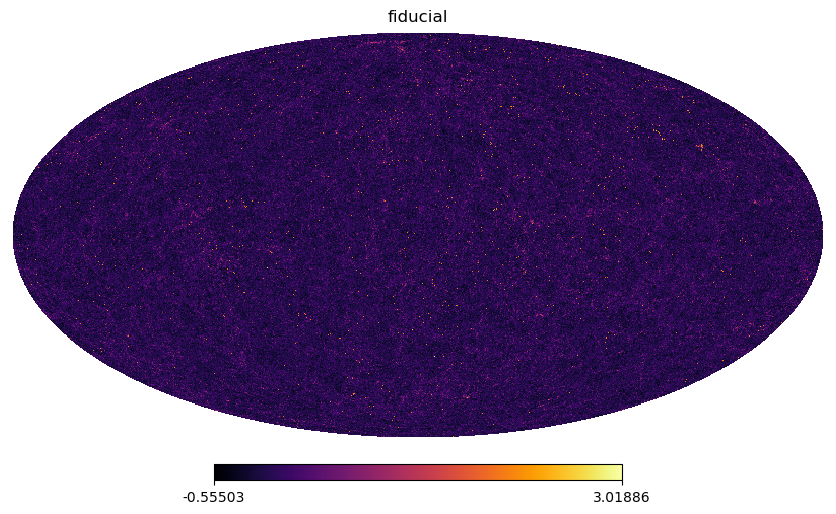

In [99]:
hp.mollview(np.log(np.mean(overdensity_array_, axis=0)+1), title='fiducial', cmap='inferno')
plt.show()

In [115]:
path_sims = '/n17data/sguerrini/CosmoGridV1/'
path_infos = '/n17data/sguerrini/CosmoGridV1/CosmoGridV1_metainfo.h5'
nside = 512

overdensity_preprocessing, z_bin_edges, cosmo_params = preprocessing_cosmogrid(path_sims, path_infos, nside, verbose=True)

[!] Preprocessing the CosmoGridsV1 simulation...
[!] Reading the cosmological parameters...
[!] Extracting overdensity maps and redshift edges for the CosmoGridsV1 simulation...


100%|██████████| 69/69 [01:24<00:00,  1.23s/it]


[!] Done in 2.0536378781000773 minutes...
[!] Number of redshift shells: 69
[!] Larger redshift: 3.5


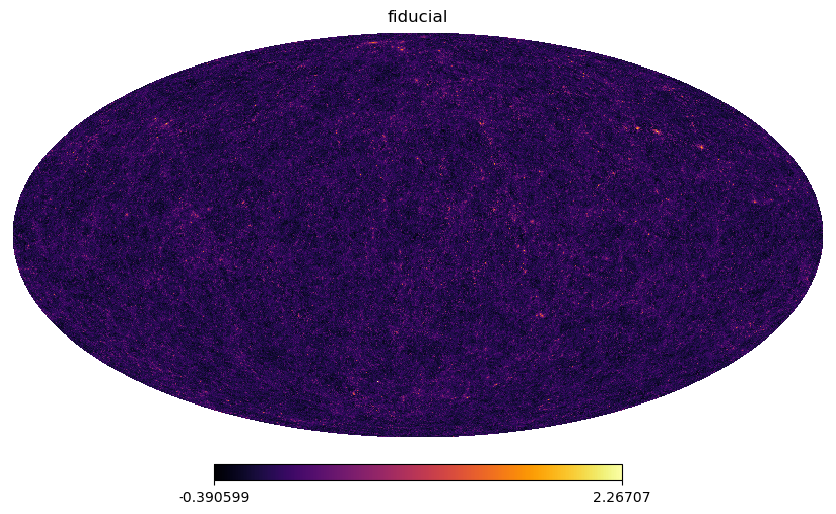

In [116]:
hp.mollview(np.log(np.mean(overdensity_preprocessing, axis=0)+1), title='fiducial', cmap='inferno')
plt.show()